# BABACHI

In [1]:
#importing modules
import sys
from io import open
from IPython.display import Image, display
import time
from IPython.display import SVG, display
import os
!{sys.executable} -m pip install -q babachi==1.3.7
from babachi import BADEstimation
from babachi.visualize_segmentation import init_from_snps_collection

In [2]:
# Datasets paths
data_dir = './data'
badmaps_dir = './badmaps'
cosmic_file_path = os.path.join('./utils', 'COSMIC_copy_number.sorted.tsv')

## Function to start segmentation
In current version of BABACHI you cannot change the prior and states from command line so we have to work with babachi as python module 

In [10]:
def segmentation_start(dataset_name, chromosomes, states, prior, cosmic_line, verbose=True):
    """
    dataset_name: name of the dataset in ./data directory
    chromosomes: list of chromosomes
    states: list of allowed states
    prior: dictionary, where keys are the states and values are initial probabilities of states
    cosmic_line: name of cell line in COSMIC database (in this project we use formatted dump of COSMIC db). 
                 Two of them are used in workshop - 'K-562', 'HCT116'
    verbose: write segmentation log if True
    """
    with open(os.path.join(data_dir, dataset_path), 'r') as dt:
        snps_collection, _, _ = BADEstimation.parse_input_file(dt)
        basename = os.path.splitext(os.path.basename(dataset_path))[0]
        badmap_file_path = os.path.join(badmaps_dir, basename + '.bed')

    #create GenomeSegmentator class (main class of segmentation)
    GS = BADEstimation.GenomeSegmentator(
        snps_collection=snps_collection,
        chromosomes_order=chromosomes,
        out=badmap_file_path,
        states=states,
        prior=prior,
        verbose=verbose
    )
    
    
    GS.estimate_BAD()


    #visualizing part
    #remove cosmic_line or cosmic file from params to remove comparison with cosmic
    init_from_snps_collection(snps_collection, BAD_file=badmap_file_path, verbose=False,
                              img_format='png', cosmic_line='K-562', cosmic_file=cosmic_file_path)
    for chromosome in chromosomes:
        display(Image(os.path.join(badmaps_dir, '{}_visualization'.format(basename),
                                        '{}_{}.png'.format(basename, chromosome))))

## Segmentation example

chr6 total SNP count: 17282


Processing SNPs in chr6
Stage 1 subchromosomes (start SNP index, end SNP index): [(0, 17282)]
Making 1 out of 56 atomic regions from SNP 0 to 604 for chr6 (subchromosome 1 of 1).
Making 2 out of 56 atomic regions from SNP 304 to 908 for chr6 (subchromosome 1 of 1).
Making 3 out of 56 atomic regions from SNP 608 to 1212 for chr6 (subchromosome 1 of 1).
Making 4 out of 56 atomic regions from SNP 912 to 1516 for chr6 (subchromosome 1 of 1).
Making 5 out of 56 atomic regions from SNP 1216 to 1820 for chr6 (subchromosome 1 of 1).
Making 6 out of 56 atomic regions from SNP 1520 to 2124 for chr6 (subchromosome 1 of 1).
Making 7 out of 56 atomic regions from SNP 1824 to 2428 for chr6 (subchromosome 1 of 1).
Making 8 out of 56 atomic regions from SNP 2128 to 2732 for chr6 (subchromosome 1 of 1).
Making 9 out of 56 atomic regions from SNP 2432 to 3036 for chr6 (subchromosome 1 of 1).
Making 10 out of 56 atomic regions from SNP 2736 to 3340 for chr6 (subchromosome 1 

findfont: Font family ['lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['lato'] not found. Falling back to DejaVu Sans.


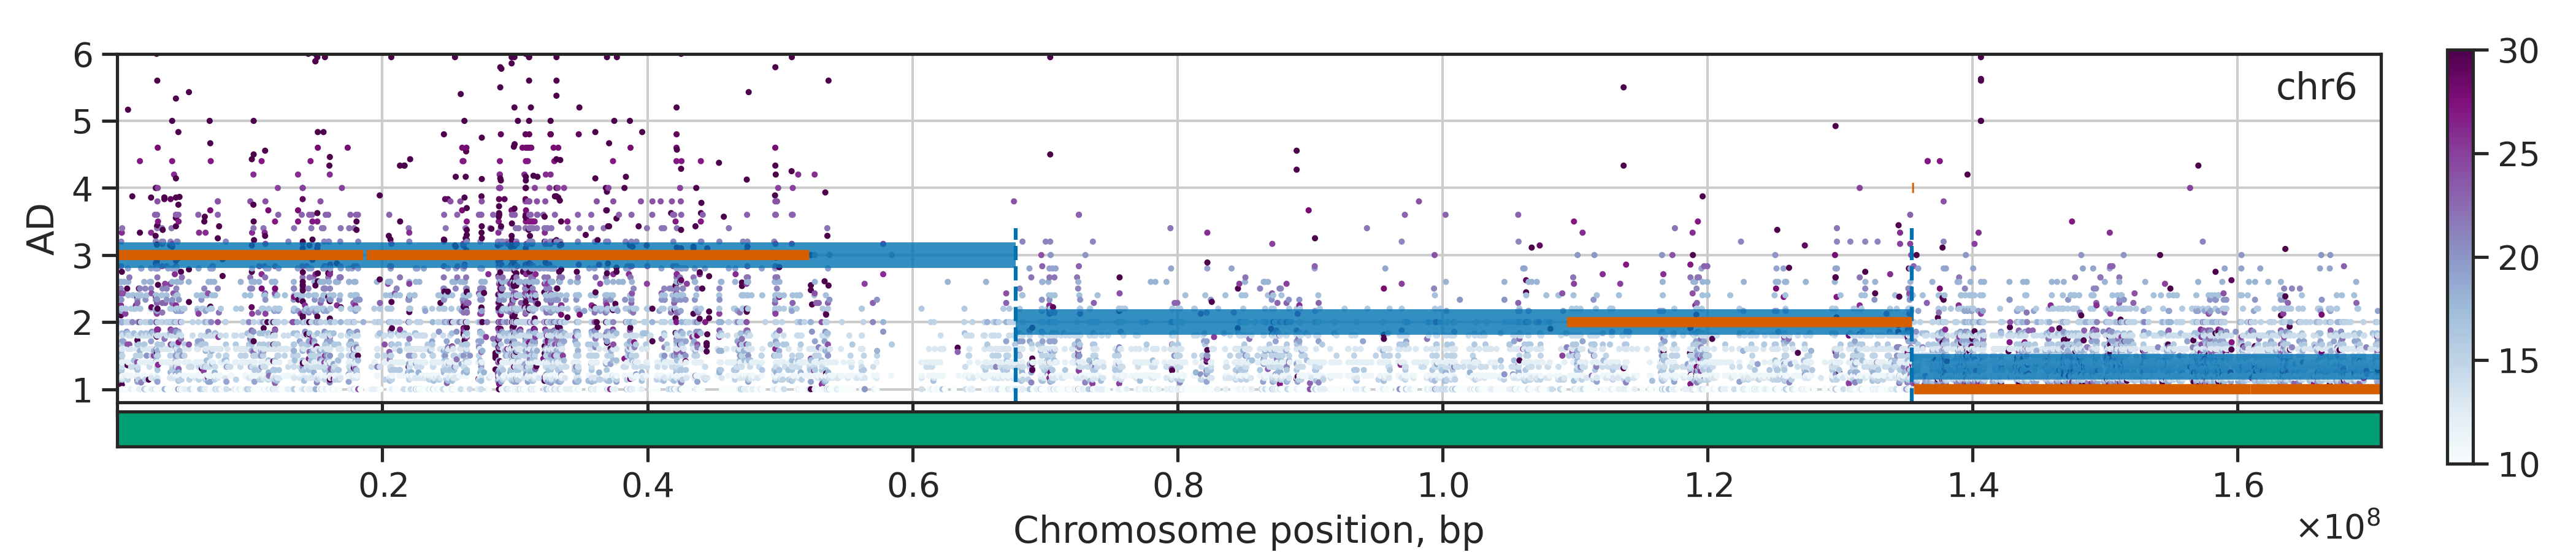

In [4]:
# K562 cells labs_michael-snyder biosamples ENCBS725WFV
dataset_path = 'K562__myelogenous_leukemia_@_labs_michael-snyder___biosamples_ENCBS725WFV_.tsv'
chromosomes = ['chr6']
cosmic_line = 'K-562'
states = [1, 2, 3, 4, 5, 6, 4 / 3, 1.5, 2.5]
#initial prior for segmentation
prior = {
    1: 1,
    2: 1,
    3: 1,
    4: 1,
    5: 1,
    6: 1,
    4/3: 1,
    1.5: 1,
    2.5: 1,
}
segmentation_start(dataset_path, chromosomes, states, prior, cosmic_line)


## Underestimation sometimes

chr17 total SNP count: 24226


Processing SNPs in chr17
Stage 1 subchromosomes (start SNP index, end SNP index): [(0, 24226)]
Making 1 out of 79 atomic regions from SNP 0 to 603 for chr17 (subchromosome 1 of 1).
Making 2 out of 79 atomic regions from SNP 303 to 906 for chr17 (subchromosome 1 of 1).
Making 3 out of 79 atomic regions from SNP 606 to 1209 for chr17 (subchromosome 1 of 1).
Making 4 out of 79 atomic regions from SNP 909 to 1512 for chr17 (subchromosome 1 of 1).
Making 5 out of 79 atomic regions from SNP 1212 to 1815 for chr17 (subchromosome 1 of 1).
Making 6 out of 79 atomic regions from SNP 1515 to 2118 for chr17 (subchromosome 1 of 1).
Making 7 out of 79 atomic regions from SNP 1818 to 2421 for chr17 (subchromosome 1 of 1).
Making 8 out of 79 atomic regions from SNP 2121 to 2724 for chr17 (subchromosome 1 of 1).
Making 9 out of 79 atomic regions from SNP 2424 to 3027 for chr17 (subchromosome 1 of 1).
Making 10 out of 79 atomic regions from SNP 2727 to 3330 for chr17 (subc

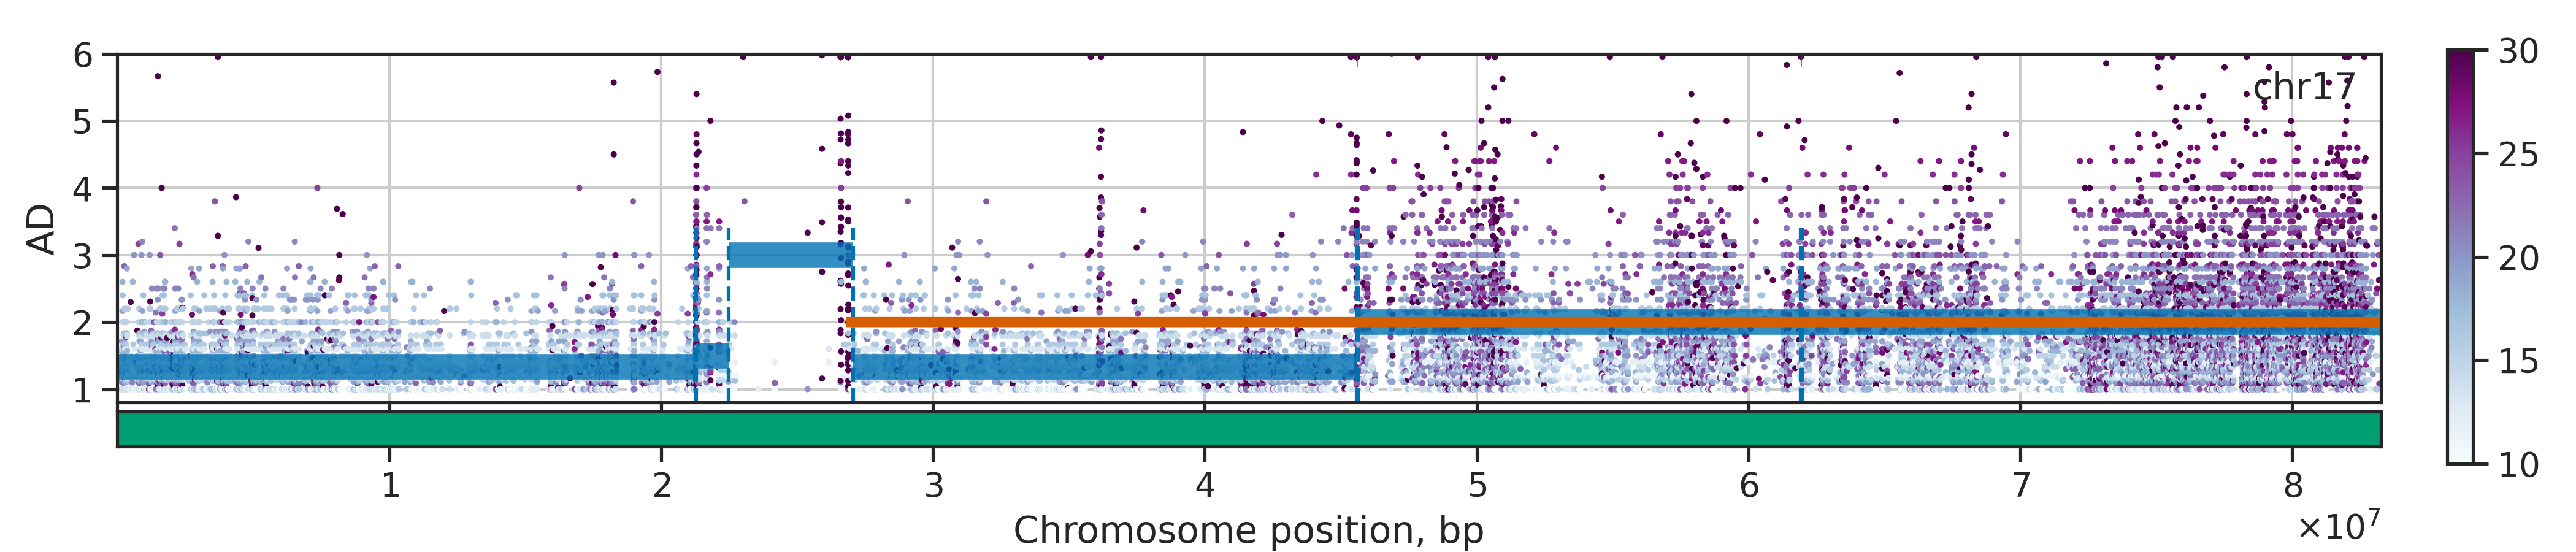

In [5]:
# HCT-116 cells labs_michael-snyder biosamples ENCBS615KTO
dataset_path = 'HCT-116__colon_carcinoma_@_labs_michael-snyder___biosamples_ENCBS615KTO_.tsv'
chromosomes = ['chr17']
cosmic_line = 'HCT116'

states = [1, 2, 3, 4, 5, 6, 4 / 3, 1.5, 2.5]
prior = {
    1: 1,
    2: 1,
    3: 1,
    4: 1,
    5: 1,
    6: 1,
    4/3: 1,
    1.5: 1,
    2.5: 1,
}
segmentation_start(dataset_path, chromosomes, states, prior, cosmic_line)

## Deletions where cosmic data is available

chr11 total SNP count: 2437


Processing SNPs in chr11
Stage 1 subchromosomes (start SNP index, end SNP index): [(0, 893), (893, 1052), (1052, 2437)]
Making 1 out of 1 atomic region from SNP 0 to 892 for chr11 (subchromosome 1 of 3).
Unique SNPs positions in subchromosome: 893
Making 1 out of 1 atomic region from SNP 0 to 158 for chr11 (subchromosome 2 of 3).
Unique SNPs positions in subchromosome: 159
Making 1 out of 3 atomic regions from SNP 0 to 662 for chr11 (subchromosome 3 of 3).
Making 2 out of 3 atomic regions from SNP 362 to 1023 for chr11 (subchromosome 3 of 3).
Making 3 out of 3 atomic regions from SNP 723 to 1384 for chr11 (subchromosome 3 of 3).
Unique SNPs positions in subchromosome: 1385

Estimated BADs: [2.00, 2.50, 2.00]
SNP counts: [893, 159, 1385]
Critical gap: 5525487bp
Boundaries positions (location: deletion length): [(207462bp: 0bp), (36747215bp: 6616764bp), (50328915bp: 6797836bp), (135086622bp: 0bp)]
chr11 time: 6.008330099999995 s




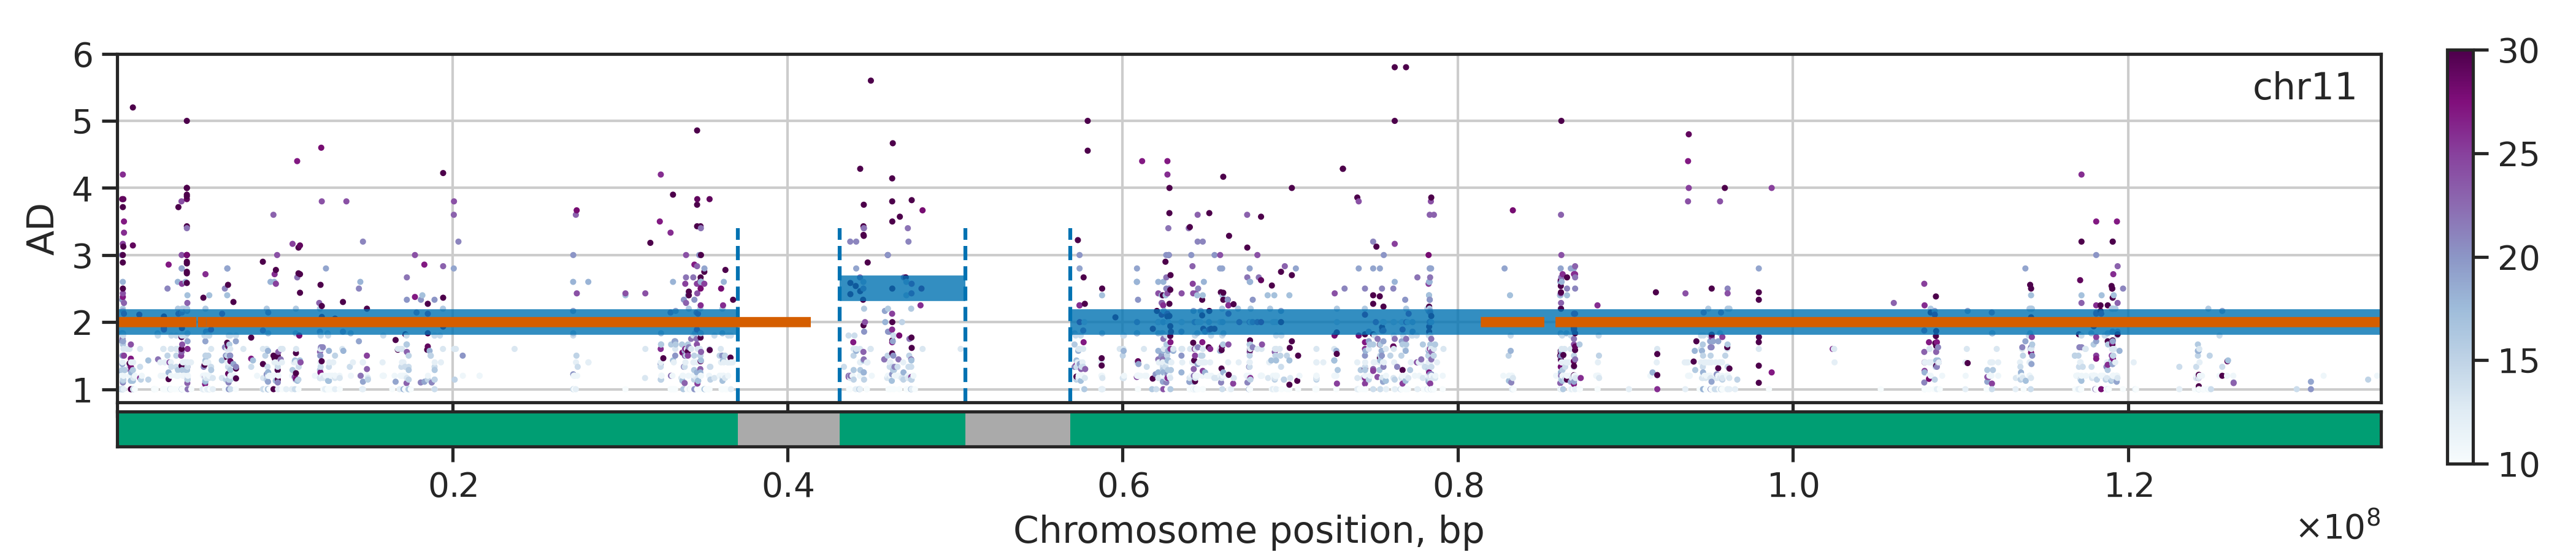

In [6]:
# K562 cells labs_michael-snyder biosamples ENCBS725WFV
dataset_path = 'K562__myelogenous_leukemia_@_labs_michael-snyder___biosamples_ENCBS384AAA_.tsv'
chromosomes = ['chr11']

cosmic_line = 'K-562'
states = [1, 2, 3, 4, 5, 6, 4 / 3, 1.5, 2.5]
prior = {
    1: 1,
    2: 1,
    3: 1,
    4: 1,
    5: 1,
    6: 1,
    4/3: 1,
    1.5: 1,
    2.5: 1,
}
segmentation_start(dataset_path, chromosomes, states, prior, cosmic_line)

## How does prior affect the result

Processing SNPs in chr10


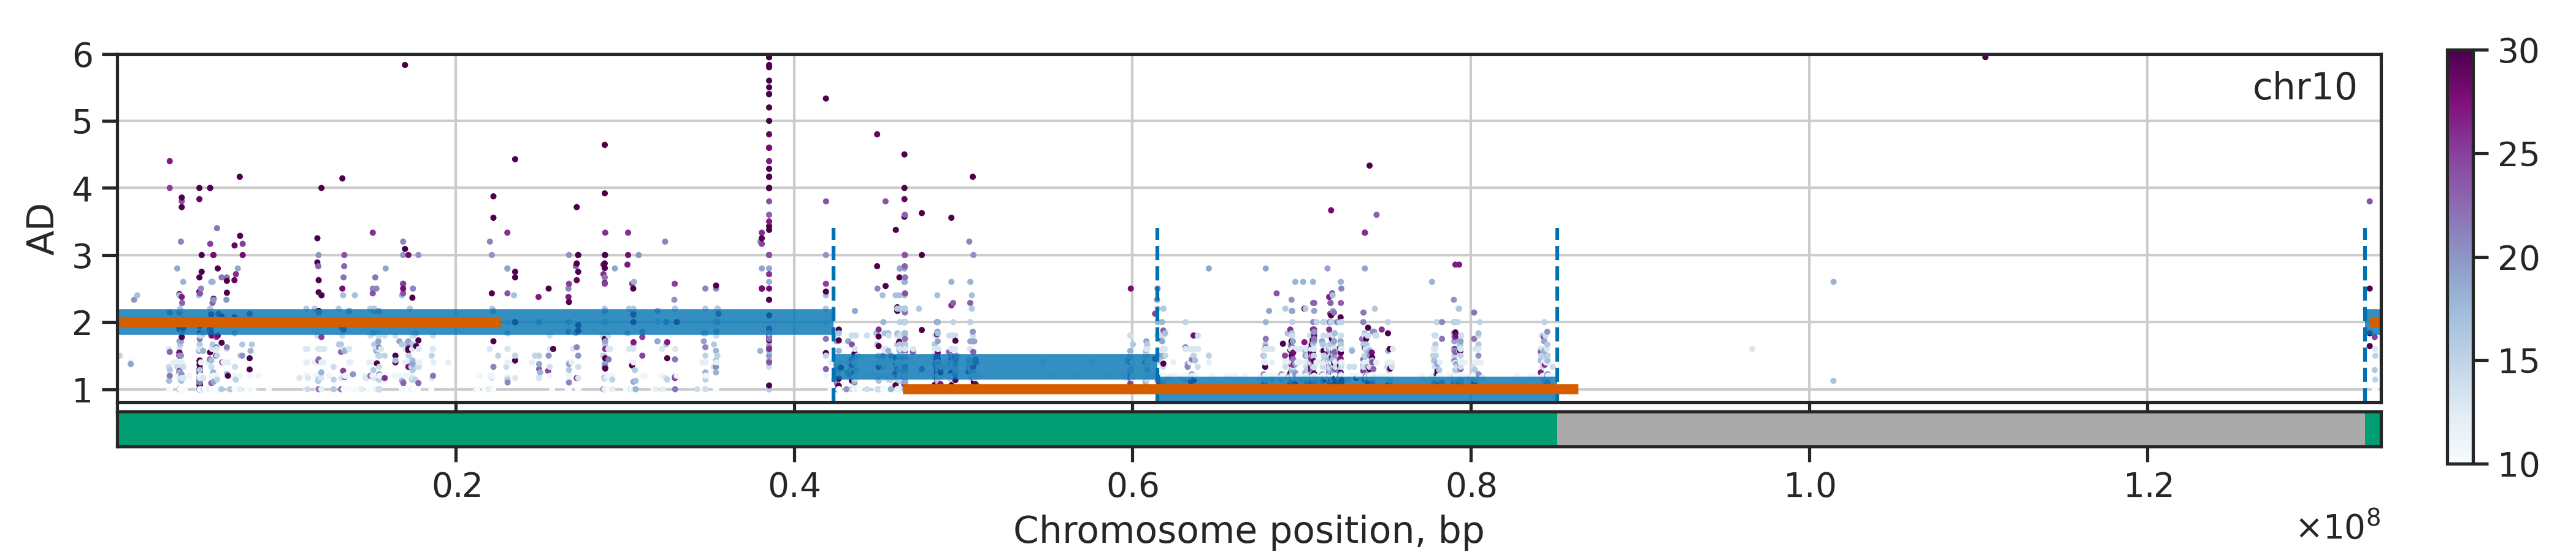

Processing SNPs in chr10


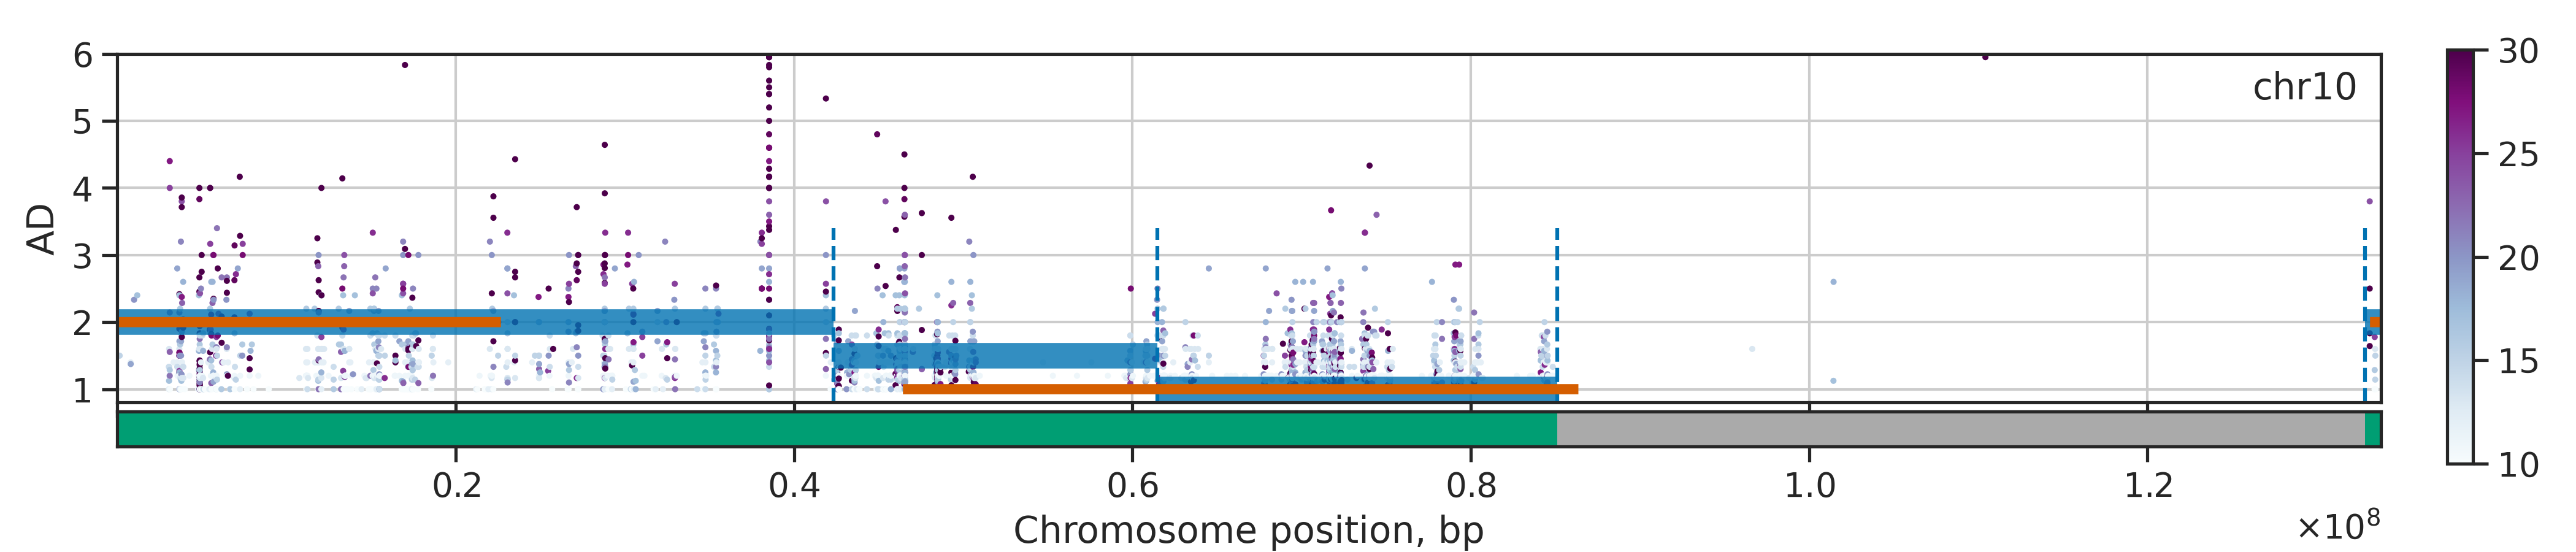

Processing SNPs in chr10


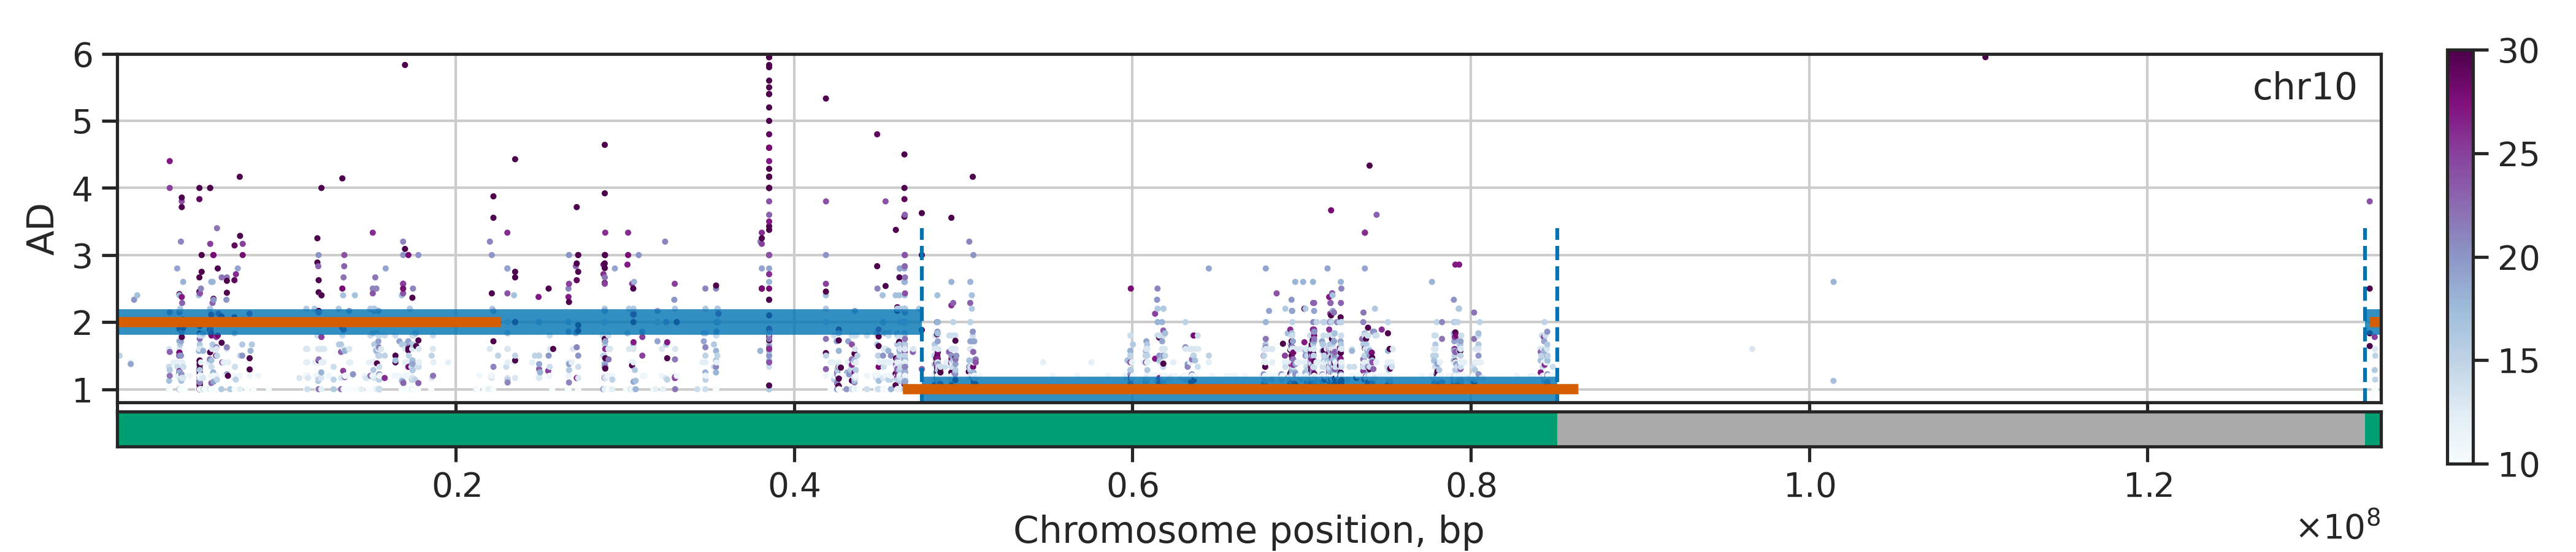

In [7]:
# K562 cells labs_michael-snyder biosamples ENCBS725WFV
dataset_path = 'K562__myelogenous_leukemia_@_labs_michael-snyder___biosamples_ENCBS384AAA_.tsv'
chromosomes = ['chr10']
cosmic_line = 'K-562'
states = [1, 2, 3, 4, 5, 6, 4 / 3, 1.5, 2.5]

prior = {
    1: 1,
    2: 1,
    3: 1,
    4: 1,
    5: 1,
    6: 1,
    4/3: 1,
    1.5: 1,
    2.5: 1,
}
segmentation_start(dataset_path, chromosomes, states, prior, cosmic_line, verbose=False)
prior = {
    1: 1,
    2: 1,
    3: 1,
    4: 1,
    5: 1,
    6: 1,
    4/3: 0.5,
    1.5: 1,
    2.5: 1,
}
segmentation_start(dataset_path, chromosomes, states, prior, cosmic_line, verbose=False)

prior = {
    1: 1,
    2: 1,
    3: 1,
    4: 1,
    5: 1,
    6: 1,
    4/3: 0.1,
    1.5: 0.1,
    2.5: 1,
}
segmentation_start(dataset_path, chromosomes, states, prior, cosmic_line, verbose=False)

## Can we achieve the same result with changing states

Processing SNPs in chr10


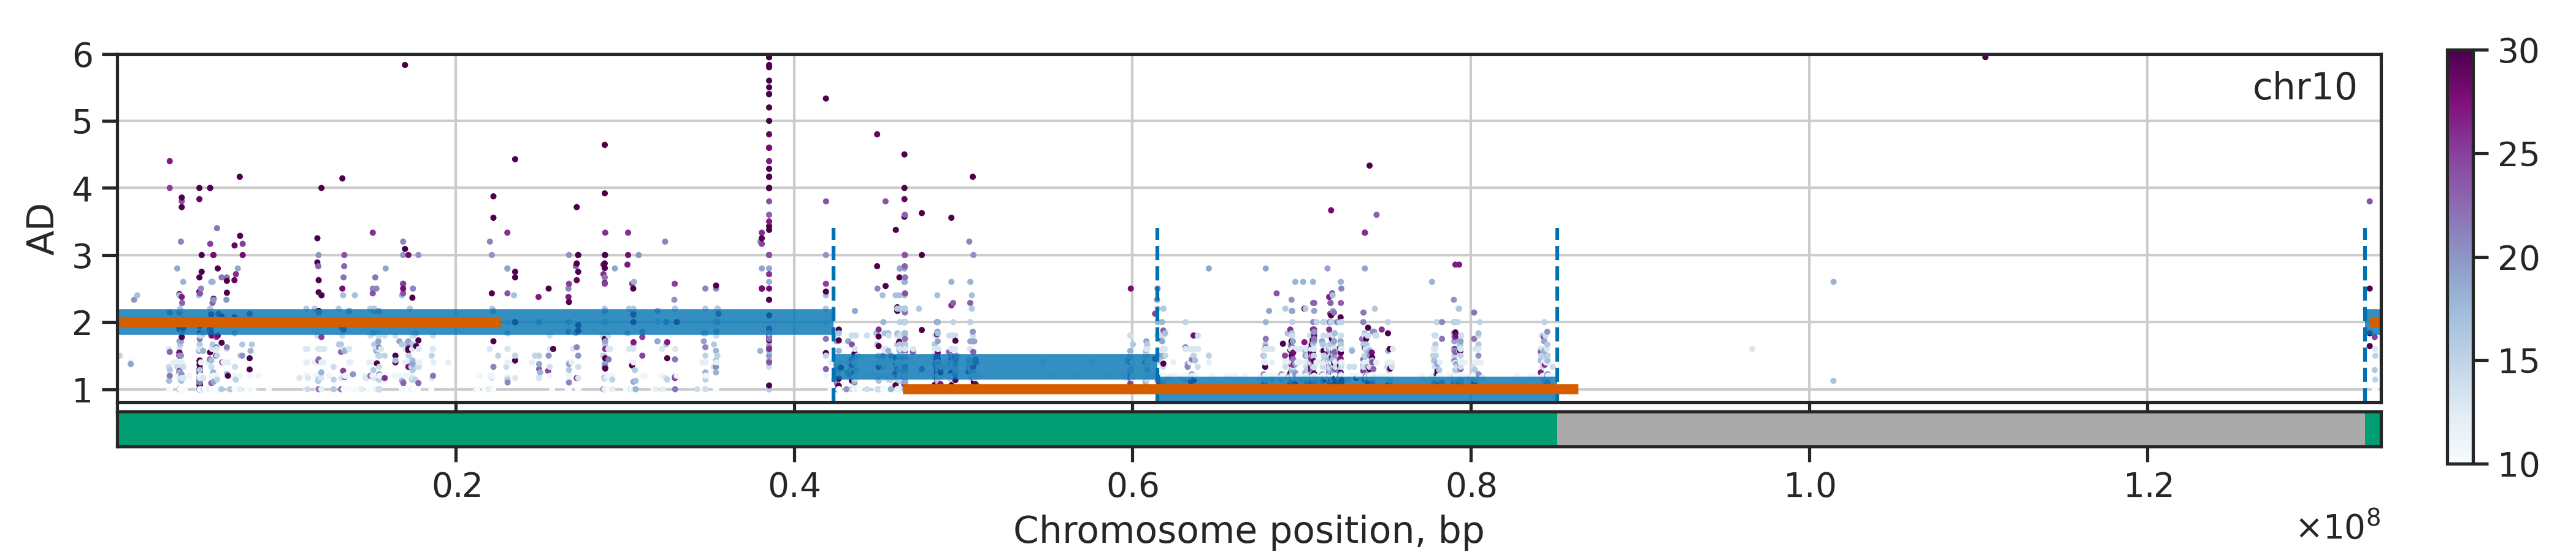

Processing SNPs in chr10


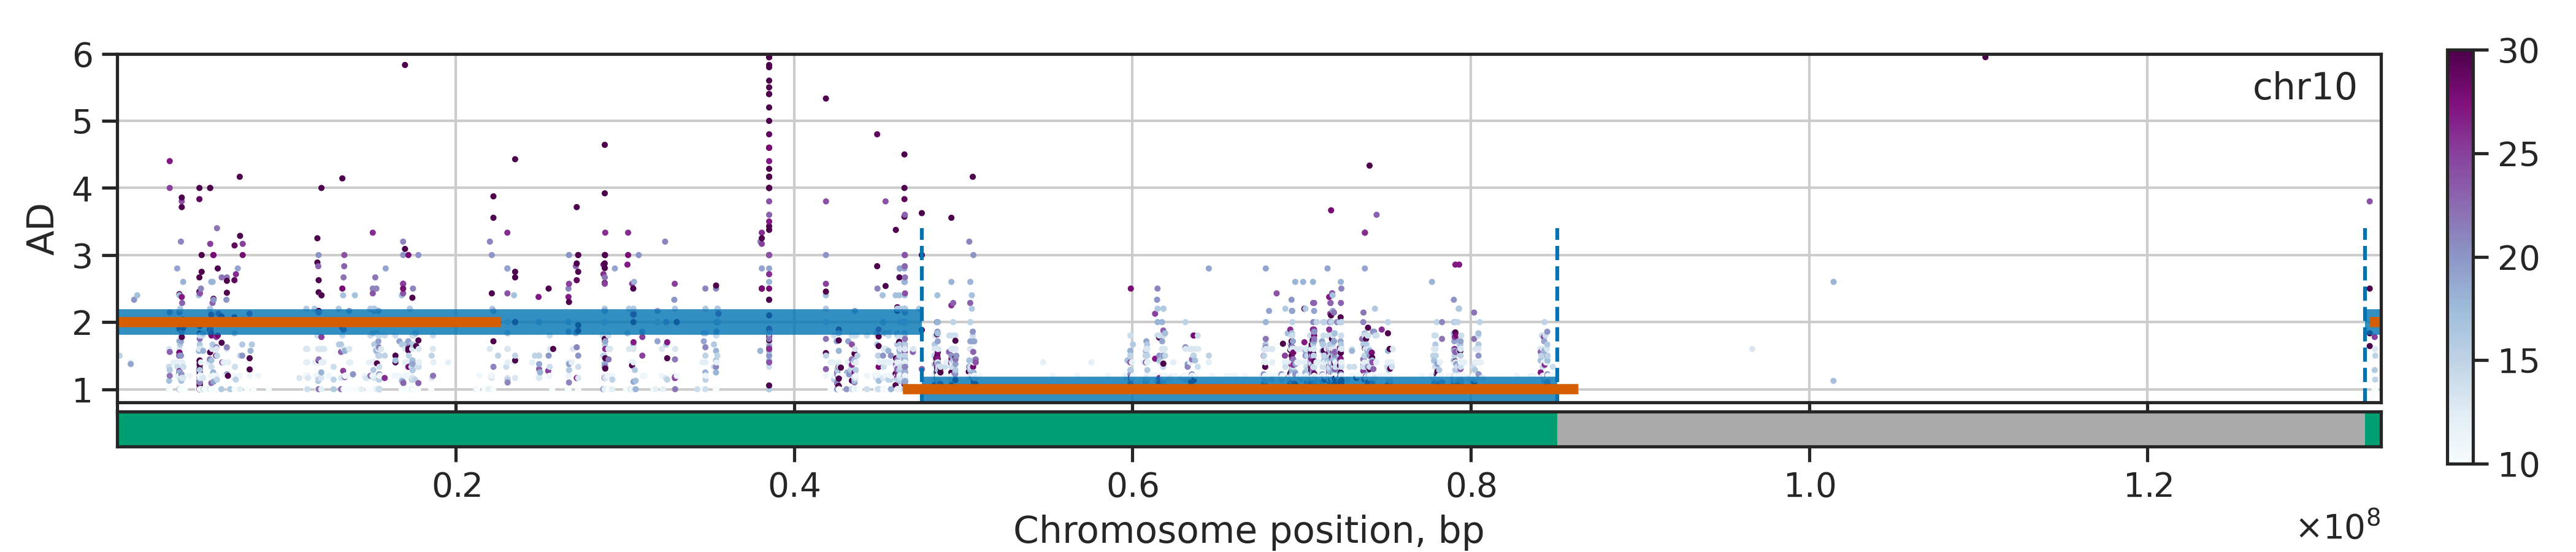

In [8]:
dataset_path = 'K562__myelogenous_leukemia_@_labs_michael-snyder___biosamples_ENCBS384AAA_.tsv'
chromosomes = ['chr10']
cosmic_line = 'K-562'

states = [1, 2, 3, 4, 5, 6, 4 / 3, 1.5, 2.5]

prior = {
    1: 1,
    2: 1,
    3: 1,
    4: 1,
    5: 1,
    6: 1,
    4/3: 1,
    1.5: 1,
    2.5: 1,
}
segmentation_start(dataset_path, chromosomes, states, prior, cosmic_line, verbose=False)

states = [1, 2, 3, 4, 5, 6, 2.5]
prior = {
    1: 1,
    2: 1,
    3: 1,
    4: 1,
    5: 1,
    6: 1,
#     4/3: 1,
#     1.5: 1,
    2.5: 1,
}
segmentation_start(dataset_path, chromosomes, states, prior, cosmic_line, verbose=False)

## One more example how states affect segmentation

Processing SNPs in chr6


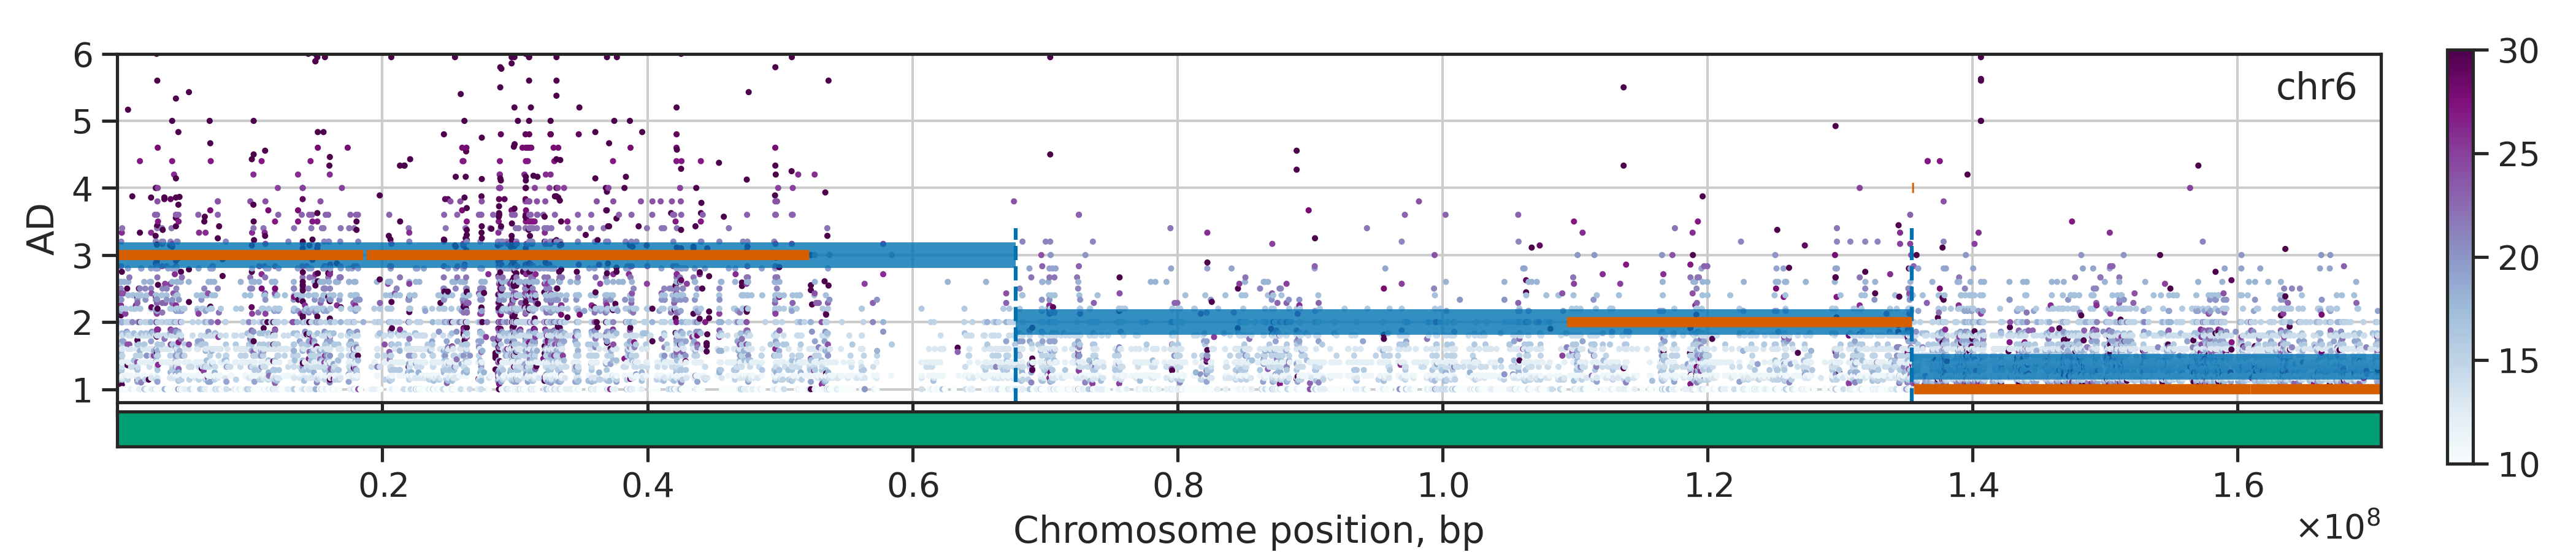

Processing SNPs in chr6


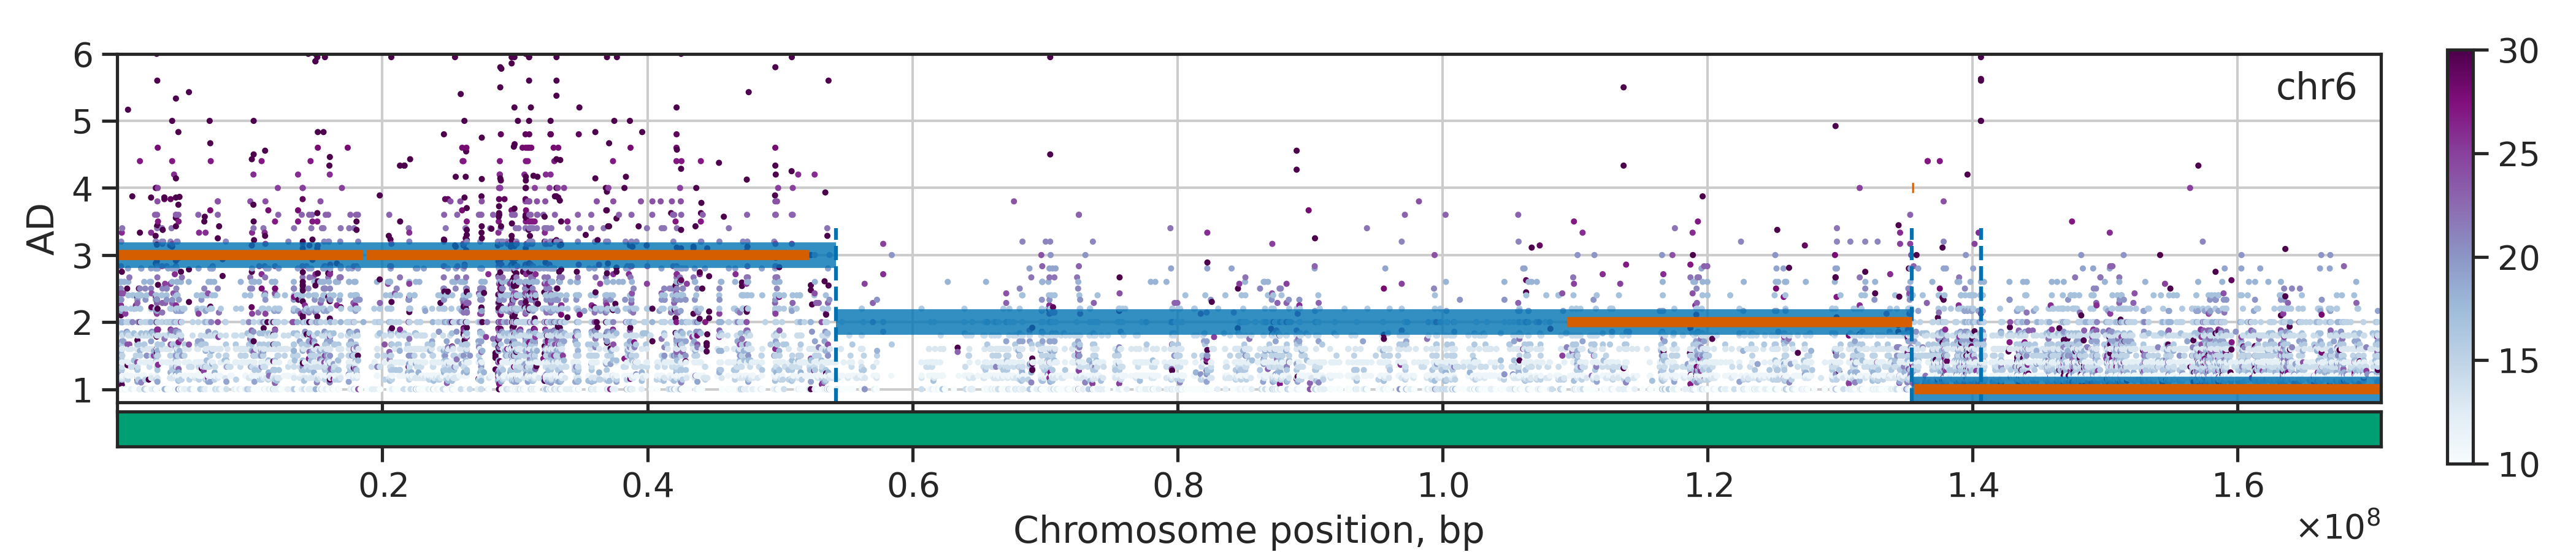

In [9]:
# K562 cells labs_michael-snyder biosamples ENCBS725WFV
dataset_path = 'K562__myelogenous_leukemia_@_labs_michael-snyder___biosamples_ENCBS725WFV_.tsv'
chromosomes = ['chr6']
cosmic_line = 'K-562'

states = [1, 2, 3, 4, 5, 6, 4 / 3, 1.5, 2.5]
prior = {
    1: 1,
    2: 1,
    3: 1,
    4: 1,
    5: 1,
    6: 1,
    4/3: 1,
    1.5: 1,
    2.5: 1,
}
segmentation_start(dataset_path, chromosomes, states, prior, cosmic_line, verbose=False)

states = [1, 2, 3, 4, 5, 6,  2.5]
prior = {
    1: 1,
    2: 1,
    3: 1,
    4: 1,
    5: 1,
    6: 1,
#     4/3: 1,
#     1.5: 1,
    2.5: 1,
}
segmentation_start(dataset_path, chromosomes, states, prior, cosmic_line, verbose=False)
